Step 1: Import Libraries
In this step, we load the tools we need for our project.

In [1]:
# Import pandas to work with data tables
import pandas as pd

# Import numpy for math operations
import numpy as np

# Import matplotlib and seaborn to create charts/graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Message to confirm everything is ready
print("All libraries are loaded and ready!")

Matplotlib is building the font cache; this may take a moment.


All libraries are loaded and ready!


Step 2: Load the Dataset
Now that the environment is ready, we will load the CSV file to start our analysis.

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('laptop_price - dataset.csv')

# Show the first 5 rows
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


Task 1: Plotting Laptop Prices
We are visualizing the distribution of prices for all laptops in the dataset.

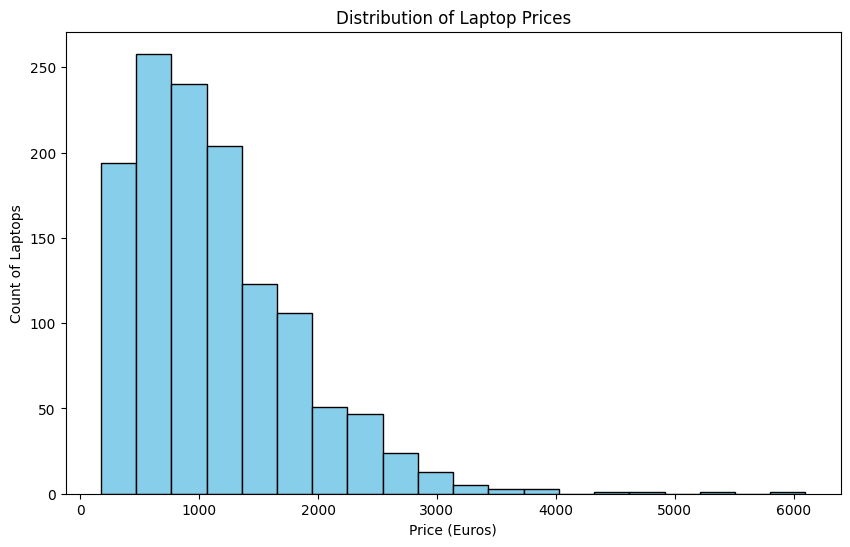

In [5]:
# Create a histogram to see how many laptops are in each price range
plt.figure(figsize=(10, 6))
plt.hist(df['Price (Euro)'], bins=20, color='skyblue', edgecolor='black')

# Adding labels and titles as requested in the instructions
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (Euros)')
plt.ylabel('Count of Laptops')

plt.show()

Task 2: Average Price per Company
We are calculating the average laptop price for each company to find which one is the most expensive.

In [6]:
# Calculate the average price for each company
avg_prices = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)

# Display the average prices
print("Average laptop price for each company:")
print(avg_prices)

# Find and print the most expensive company on average
most_expensive = avg_prices.idxmax()
highest_avg = avg_prices.max()

print(f"\nThe company with the most expensive laptops on average is: {most_expensive} ({highest_avg:.2f} Euro)")

Average laptop price for each company:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

The company with the most expensive laptops on average is: Razer (3346.14 Euro)


Task 3: Operating Systems Analysis
We are checking the different types of Operating Systems (OpSys) and making the names uniform.

In [7]:
# Check the unique values in OpSys column
print("Operating systems before cleaning:")
print(df['OpSys'].unique())

# Fix the names to be uniform (grouping all Windows together and Mac together)
# This makes the data easier to analyze
df['OpSys'] = df['OpSys'].replace({
    'Windows 10': 'Windows',
    'Windows 7': 'Windows',
    'Windows 10 S': 'Windows',
    'Mac OS X': 'macOS',
    'macOS': 'macOS'
})

print("\nOperating systems after cleaning:")
print(df['OpSys'].unique())

Operating systems before cleaning:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']

Operating systems after cleaning:
['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


Task 4: Price Distribution per Operating System
We are creating separate plots for each operating system to see how their prices are distributed.

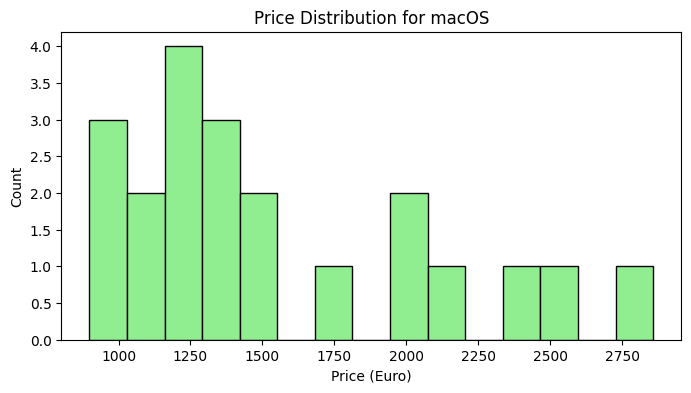

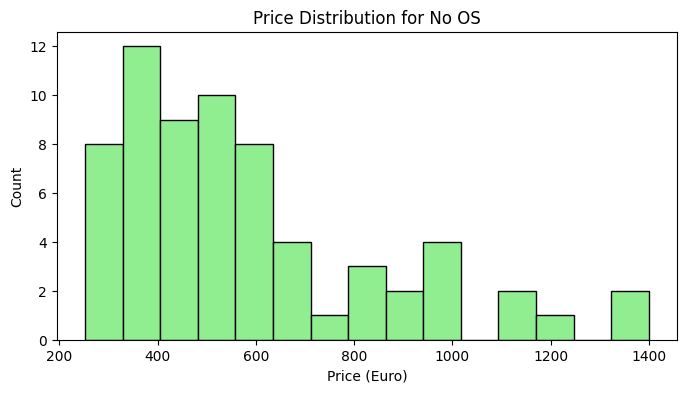

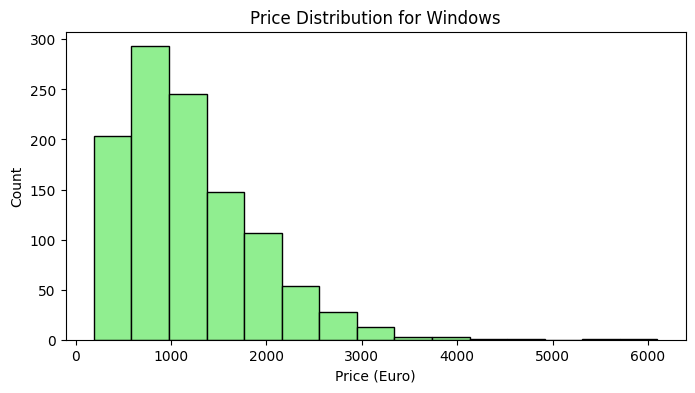

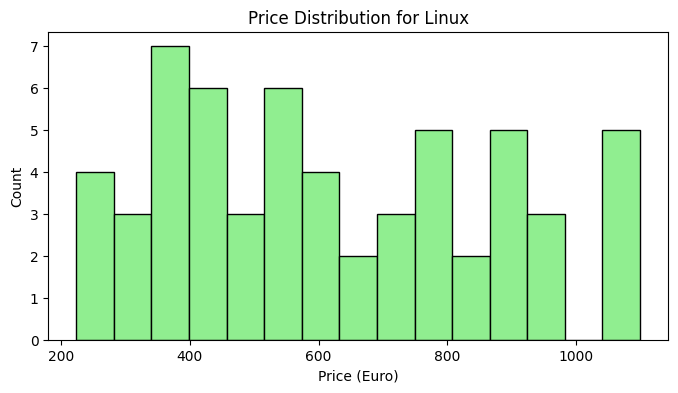

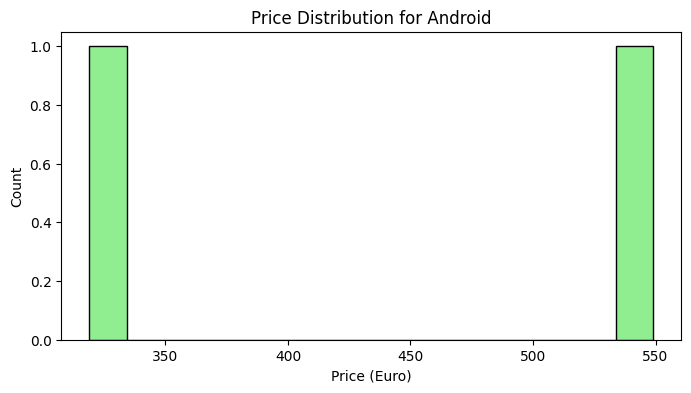

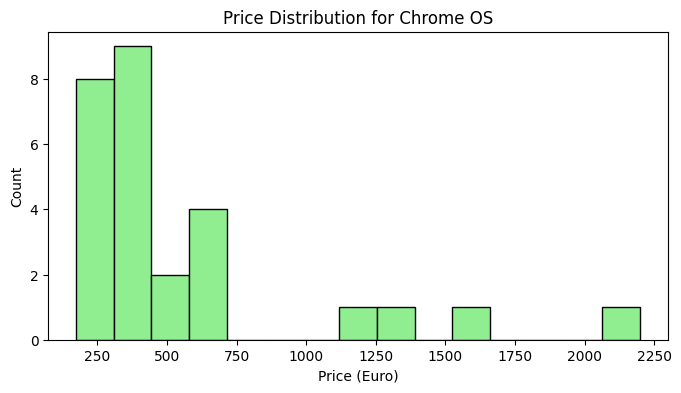

In [8]:
# Get the list of unique operating systems after cleaning
systems = df['OpSys'].unique()

# Create a plot for each operating system
for os_name in systems:
    plt.figure(figsize=(8, 4))
    
    # Filter the data for the specific OS
    os_data = df[df['OpSys'] == os_name]
    
    # Create the histogram
    plt.hist(os_data['Price (Euro)'], bins=15, color='lightgreen', edgecolor='black')
    
    # Add titles and labels as required
    plt.title(f'Price Distribution for {os_name}')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Count')
    
    plt.show()

Task 5: Relationship between RAM and Price
We are checking how the amount of RAM affects the laptop price. We will also look for outliers (extreme values) in the data.

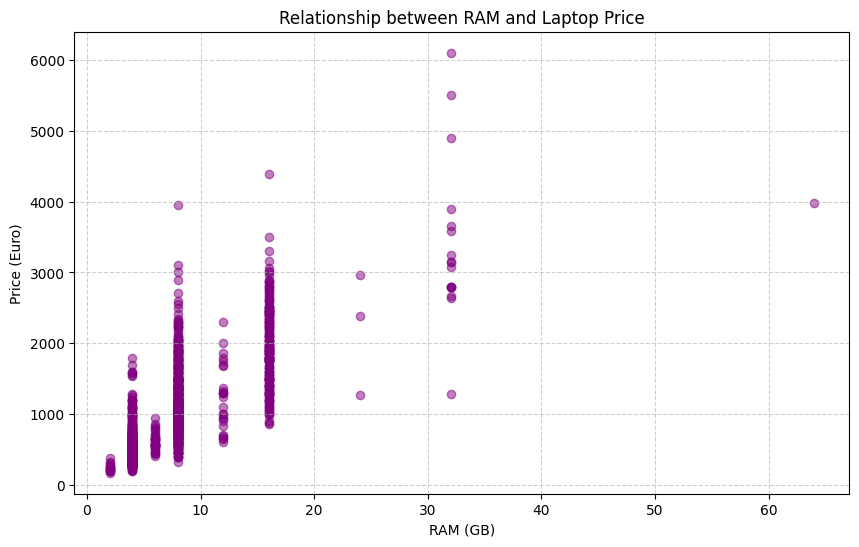

Outlier Detection:
Laptops with very high RAM or Price might be considered outliers.


In [9]:
# Create a scatter plot to see the relationship between RAM and Price
plt.figure(figsize=(10, 6))
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], alpha=0.5, color='purple')

# Adding labels and titles
plt.title('Relationship between RAM and Laptop Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Detect potential outliers using a simple method (values very far from the average)
print("Outlier Detection:")
print("Laptops with very high RAM or Price might be considered outliers.")

Discussion about Outliers:
•	What is an outlier? An outlier is a data point that is significantly different from the others (for example, a laptop with 64GB RAM or a price over 5000 Euro).
•	How to detect it? We can detect outliers visually using a scatter plot or a box plot. Mathematically, we can use the Interquartile Range (IQR) or Z-score.



Task 6: Creating Storage Type Column
We are extracting the storage type (SSD, HDD, etc.) from the 'Memory' column and saving it in a new column called 'Storage type'.

In [10]:
# Define a function to find the storage type in the text
def get_storage_type(memory_string):
    if 'SSD' in memory_string:
        return 'SSD'
    elif 'HDD' in memory_string:
        return 'HDD'
    elif 'Flash Storage' in memory_string:
        return 'Flash Storage'
    elif 'Hybrid' in memory_string:
        return 'Hybrid'
    else:
        return 'Other'

# Create the new column 'Storage type' by applying the function
df['Storage type'] = df['Memory'].apply(get_storage_type)

# Show the result: the original Memory column and the new Storage type column
print("Check the new 'Storage type' column:")
df[['Memory', 'Storage type']].head(10)

Check the new 'Storage type' column:


,Memory,Storage type
0,128GB SSD,SSD
1,128GB Flash Storage,Flash Storage
2,256GB SSD,SSD
3,512GB SSD,SSD
4,256GB SSD,SSD
5,500GB HDD,HDD
6,256GB Flash Storage,Flash Storage
7,256GB Flash Storage,Flash Storage
8,512GB SSD,SSD
9,256GB SSD,SSD


Final Summary
All tasks from the assignment have been completed. We have analyzed prices, cleaned operating system names, visualized data relationships, and extracted storage information.